#  Annotation

## Settings 

In [1]:
# Path related settings (these should be the same as for the previous notebook)
output_dir = '/mnt/workspace/jdetlef/processed_data'
test = 'Esophagus'

# Gene annotation
GTF_PATH = "/mnt/workspace/jdetlef/data/genome/gencode.v39.annotation_sorted.gtf"
# Cell type annotation
CTA_PATH = "/mnt/workspace/jdetlef/sc-atac-framework/ctannot"

## Loading packages and setup

In [2]:
import sctoolbox.atac_tree as sub_tree
import sctoolbox.annotation as annot
import sctoolbox.custom_celltype_annotation as ctannot
import episcanpy as epi
import scanpy as sc
from matplotlib import pyplot as plt
from pybiomart import Dataset

## Setup path handling object 

In [3]:
# make an instance of the class
tree = sub_tree.ATAC_tree()
# set processing/output directory
tree.processing_dir = output_dir
# set sample/experiment.. 
tree.run = test

all directories existing
all directories existing


In [4]:
tree.gtf_path = GTF_PATH

## Load anndata

In [5]:
clustering_output = tree.clustering_anndata
adata = epi.read_h5ad(clustering_output)
adata

AnnData object with n_obs × n_vars = 11404 × 154712
    obs: 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'n_features_by_counts', 'log1p_n_features_by_counts', 'total_counts', 'log1p_total_counts', 'insertsize_count', 'mean_insertsize', 'nb_features', 'log_nb_features', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'clustering'
    var: 'peak_chr', 'peak_start', 'peak_end', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score', 'highly_variable'
    uns: 'clustering_colors', 'color_set', 'infoprocess', 'insertsize_distribution', 'legend', 'leiden', 'leiden_0.1_colors', 'leiden_0.2_colors', 'leiden_0.3_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.7_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'log1p', 'neighbors', 'pca', 'sample_colo

## Gene annotation 

In [6]:
annot.annotate_adata(adata,
                   GTF_PATH,
                   config=None,
                   best=True,
                   threads=1,
                   coordinate_cols=None,
                   temp_dir="",
                   verbose=True,
                   inplace=True)

Setting up annotation configuration...
Config dictionary: {'queries': [{'distance': [10000, 1000], 'feature_anchor': ['start'], 'feature': ['gene'], 'name': 'promoters'}], 'priority': True, 'show_attributes': ['all'], 'output_by_query': False}
Setting up genomic regions to annotate...
The regions in adata.var are not in the correct format. Trying to format the index.
formatting adata.var index to coordinate columns:
Preparing gtf file for annotation...
- Reading gtf with Tabix
- Index of gtf not found - trying to index gtf
- Reading gtf with Tabix
Done preparing gtf!
Annotating regions...
NOTE: Increase --threads to speed up computation
Formatting annotations...
Finished annotation of features! The results are found in the .var table.
[Errno 2] No such file or directory: ''


In [7]:
adata.var['gene_name']

b'chr1':10005-10731              DDX11L1
b'chr1':28730-29439          MIR1302-2HG
b'chr1':180710-182007           DDX11L17
b'chr1':191767-191866          MIR6859-2
b'chr1':267907-268117                NaN
                                ...     
b'chrY':56848712-56848935        CTBP2P1
b'chrY':56850329-56850514        CTBP2P1
b'chrY':56850723-56851209        CTBP2P1
b'chrY':56870836-56871063            NaN
b'chrY':56886838-56887007            NaN
Name: gene_name, Length: 154712, dtype: category
Categories (27993, object): ['5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG-AS1', ..., 'ZYG11B', 'ZYX', 'ZZZ3', 'hsa-mir-1253']

In [8]:
adata.obs


,TN,UM,PP,UQ,CM,file,sample,n_features_by_counts,log1p_n_features_by_counts,total_counts,...,leiden_0.1,leiden_0.2,leiden_0.3,leiden_0.4,leiden_0.5,leiden_0.6,leiden_0.7,leiden_0.8,leiden_0.9,clustering
barcode,,,,,,,,,,,,,,,,,,,,,
AAACTACCAGAAACGTCCCGTT,6223.0,5232.0,5214.0,3780.0,18.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,1338,7.199678,1338.0,...,2,2,1,1,4,3,3,2,3,2
AAACTACCAGAACTAACGTCGA,8196.0,6756.0,6737.0,4617.0,382.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,271,5.605802,271.0,...,4,4,4,4,3,6,6,6,6,4
AAACTACCAGAATGGCCGTTTC,23198.0,20082.0,20039.0,14075.0,1132.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,3855,8.257386,3855.0,...,1,1,2,2,1,2,2,3,1,1
AAACTACCAGACAGATCAACGC,5869.0,4993.0,4976.0,3411.0,35.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,1154,7.051856,1154.0,...,5,5,5,5,6,7,8,7,10,5
AAACTACCAGACAGCGTCACTA,5886.0,5183.0,5176.0,4074.0,22.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,1846,7.521318,1846.0,...,3,3,3,3,2,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCCATCCTCTTCTCATGGTCA,5447.0,4744.0,4728.0,3243.0,10.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,1475,7.297091,1475.0,...,3,3,3,3,2,1,1,1,2,3
TTCCATCCTCTTGACAAGTCCT,1577.0,1342.0,1337.0,909.0,1.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,253,5.537334,253.0,...,5,5,5,5,6,13,13,13,14,5
TTCCATCCTCTTGAGCCCGGAT,9935.0,7985.0,7957.0,5603.0,13.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,577,6.359574,577.0,...,6,6,7,7,8,8,9,8,8,6


In [9]:
assigned_features = adata.var['gene_name'].dropna()
assigned_features

b'chr1':10005-10731                  DDX11L1
b'chr1':28730-29439              MIR1302-2HG
b'chr1':180710-182007               DDX11L17
b'chr1':191767-191866              MIR6859-2
b'chr1':586082-586309        ENSG00000235146
                                  ...       
b'chrY':26641361-26641472            PARP4P1
b'chrY':56847744-56848068            CTBP2P1
b'chrY':56848712-56848935            CTBP2P1
b'chrY':56850329-56850514            CTBP2P1
b'chrY':56850723-56851209            CTBP2P1
Name: gene_name, Length: 49587, dtype: category
Categories (27993, object): ['5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG-AS1', ..., 'ZYG11B', 'ZYX', 'ZZZ3', 'hsa-mir-1253']

In [10]:
dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

df = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'])

In [11]:
ens_dict = dict(zip(df['Gene stable ID'], df['Gene name']))

In [12]:
drop_count = 0
for index, gene in enumerate(assigned_features):
    if gene.startswith("ENSG"):
        if gene in ens_dict.keys():
            if isinstance(ens_dict[gene], str):
                assigned_features.replace(gene, ens_dict[gene], inplace=True)
            else:
                # assigned_features.drop(labels=assigned_features.index[index-drop_count], inplace=True)
                drop_count += 1

In [13]:
assigned_features

b'chr1':10005-10731                  DDX11L1
b'chr1':28730-29439              MIR1302-2HG
b'chr1':180710-182007               DDX11L17
b'chr1':191767-191866              MIR6859-2
b'chr1':586082-586309        ENSG00000235146
                                  ...       
b'chrY':26641361-26641472            PARP4P1
b'chrY':56847744-56848068            CTBP2P1
b'chrY':56848712-56848935            CTBP2P1
b'chrY':56850329-56850514            CTBP2P1
b'chrY':56850723-56851209            CTBP2P1
Name: gene_name, Length: 49587, dtype: category
Categories (27990, object): ['5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG-AS1', ..., 'ZYG11B', 'ZYX', 'ZZZ3', 'hsa-mir-1253']

In [14]:
assigned_adata = adata[:, assigned_features.index]
assigned_adata

View of AnnData object with n_obs × n_vars = 11404 × 49587
    obs: 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'n_features_by_counts', 'log1p_n_features_by_counts', 'total_counts', 'log1p_total_counts', 'insertsize_count', 'mean_insertsize', 'nb_features', 'log_nb_features', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'clustering'
    var: 'peak_chr', 'peak_start', 'peak_end', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score', 'highly_variable', 'annotation_feature', 'gene_strand', 'gene_start', 'gene_end', 'annotation_query', 'query_name', 'distance_to_gene', 'gene_anchor', 'gene_ovl_peak', 'peak_ovl_gene', 'relative_location_to_gene', 'gene_id', 'gene_type', 'gene_name', 'level', 'hgnc_id', 'havana_gene', 'tag'
    uns: 'clustering_colors', 'color_set', 'infoproces

In [15]:
peaks_adata = assigned_adata.copy()

## Rank peaks

In [16]:
adata.obs['clustering']


barcode
AAACTACCAGAAACGTCCCGTT    2
AAACTACCAGAACTAACGTCGA    4
AAACTACCAGAATGGCCGTTTC    1
AAACTACCAGACAGATCAACGC    5
AAACTACCAGACAGCGTCACTA    3
                         ..
TTCCATCCTCTTCTCATGGTCA    3
TTCCATCCTCTTGACAAGTCCT    5
TTCCATCCTCTTGAGCCCGGAT    6
TTCCATCCTCTTGCATGTACGC    1
TTCCATCCTCTTGGCTGTCTGT    4
Name: clustering, Length: 11404, dtype: category
Categories (8, object): ['1', '2', '3', '4', '5', '6', '7', '8']

In [17]:
adata.uns

OverloadedDict, wrapping:
	{'clustering_colors': array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f'], dtype=object), 'color_set': array(['red', 'blue', 'green', 'pink', 'chartreuse', 'gray', 'yellow',
       'brown', 'purple', 'orange', 'wheat', 'lightseagreen', 'cyan',
       'khaki', 'cornflowerblue', 'olive', 'gainsboro', 'darkmagenta',
       'slategray', 'ivory', 'darkorchid', 'papayawhip', 'paleturquoise',
       'oldlace', 'orangered', 'lavenderblush', 'gold', 'seagreen',
       'deepskyblue', 'lavender', 'peru', 'silver', 'midnightblue',
       'antiquewhite', 'blanchedalmond', 'firebrick', 'greenyellow',
       'thistle', 'powderblue', 'darkseagreen', 'darkolivegreen',
       'moccasin', 'olivedrab', 'mediumseagreen', 'lightgray',
       'darkgreen', 'tan', 'yellowgreen', 'peachpuff', 'cornsilk',
       'darkblue', 'violet', 'cadetblue', 'palegoldenrod',
       'darkturquoise', 'sienna', 'mediumorchid', 'springgreen',
       'd

In [18]:
peaks_adata.uns['log1p']['base'] = None

In [19]:
for res in adata.uns['infoprocess']['leiden_res']:
    print(f'Ranking peaks for leiden clusters with resolution: {res}')
    epi.tl.rank_features(peaks_adata, f'leiden_{res}', omic='ATAC', 
                         key_added=f'rank_features_groups_{res}', n_features=100, use_raw=False)
    
print('Done')

Ranking peaks for leiden clusters with resolution: 0.1
Done


## Rank genes
Replace peaks with gene names

In [20]:
genes_adata = peaks_adata.copy()
genes_adata.var.reset_index(inplace=True)  # remove peaks from index and save them in the column ['index']
genes_adata.var.set_index('gene_name',inplace=True)  # set genes as index
genes_adata.var.index = genes_adata.var.index.astype('str')  # to avoid index being categorical
genes_adata.var_names_make_unique(join='_')
genes_adata.raw = genes_adata

In [21]:
for res in adata.uns['infoprocess']['leiden_res']:
    print(f'Ranking genes groups for leiden clusters with resolution: {res}')
    sc.tl.rank_genes_groups(genes_adata, groupby=f'leiden_{res}', use_raw=False, key_added=f'rank_genes_groups_{res}')

print('Done')

Ranking genes groups for leiden clusters with resolution: 0.1
Done


### Plot ranked genes

Plotting ranked genes groups for leiden with resolution: 0.1


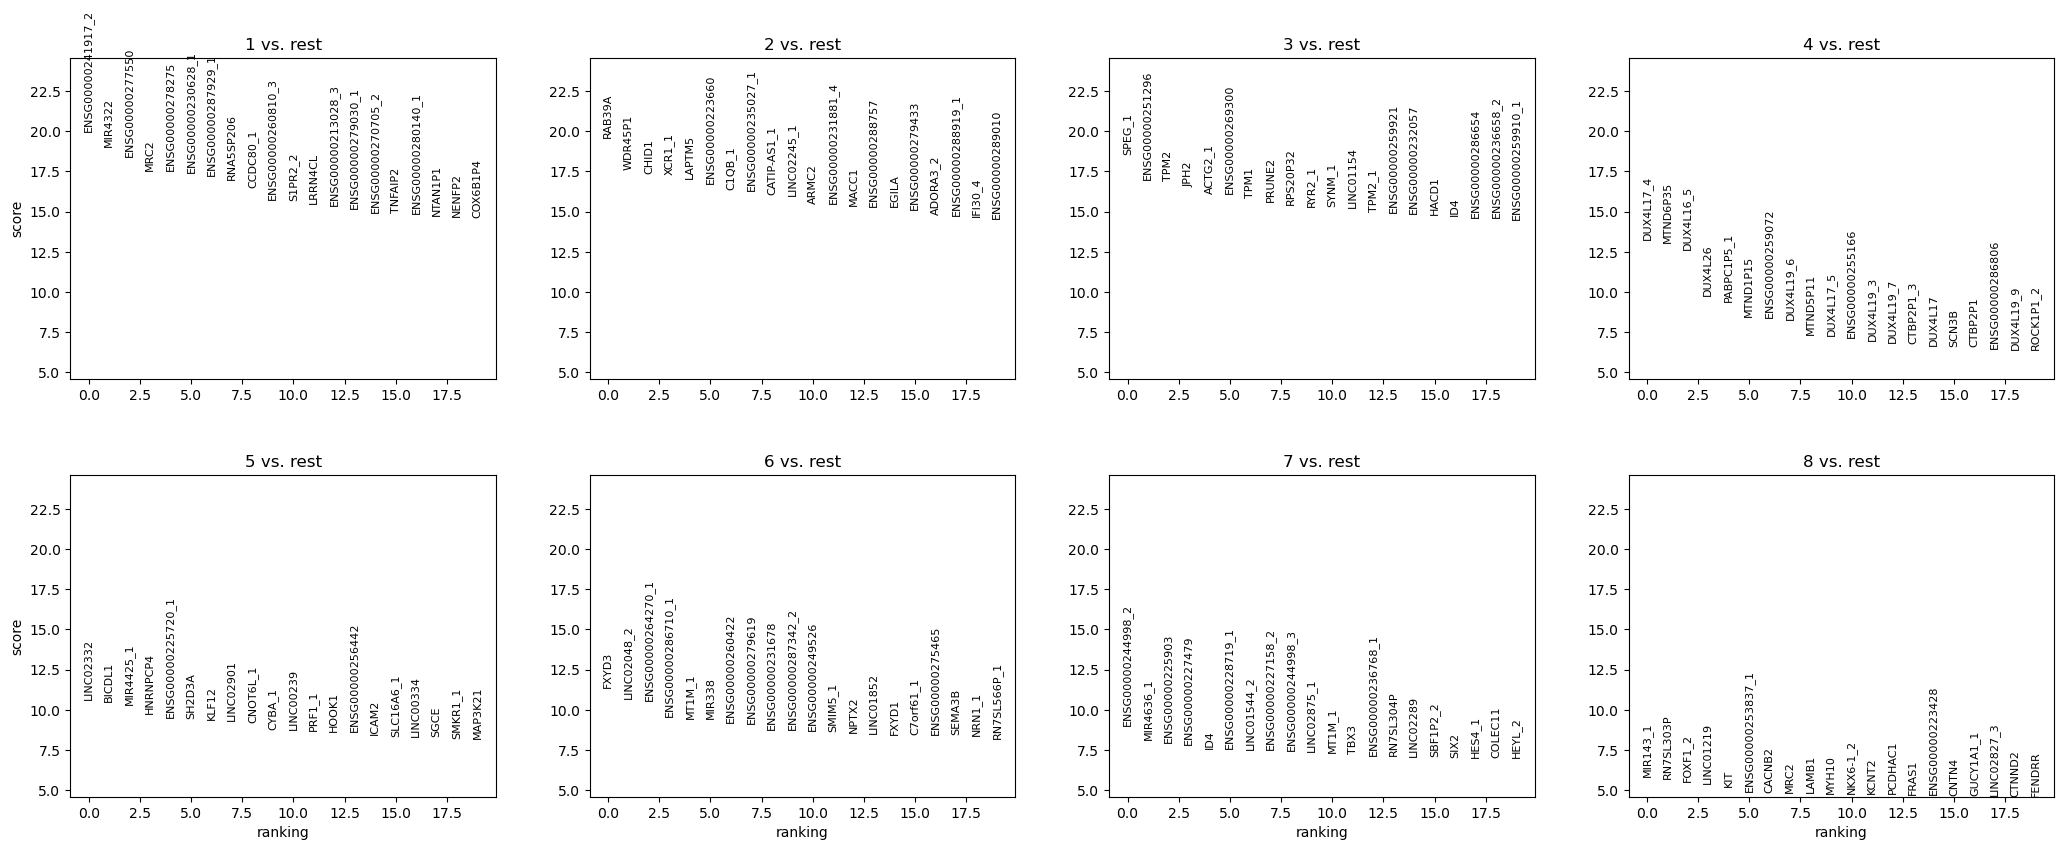

In [22]:
for res in adata.uns['infoprocess']['leiden_res']:
    print(f'Plotting ranked genes groups for leiden with resolution: {res}')
    plot_key = 'rank_genes_groups_' + str(res)
    sc.pl.rank_genes_groups(genes_adata, key=plot_key, show=False)
    # TODO
    # if save_figs:
    #    plt.savefig(f'{OUTPUT_FIGS}/ranked_genes_groups_leiden_{res}.png')
    plt.show()

Plotting matrixplot for leiden with resolution: 0.1


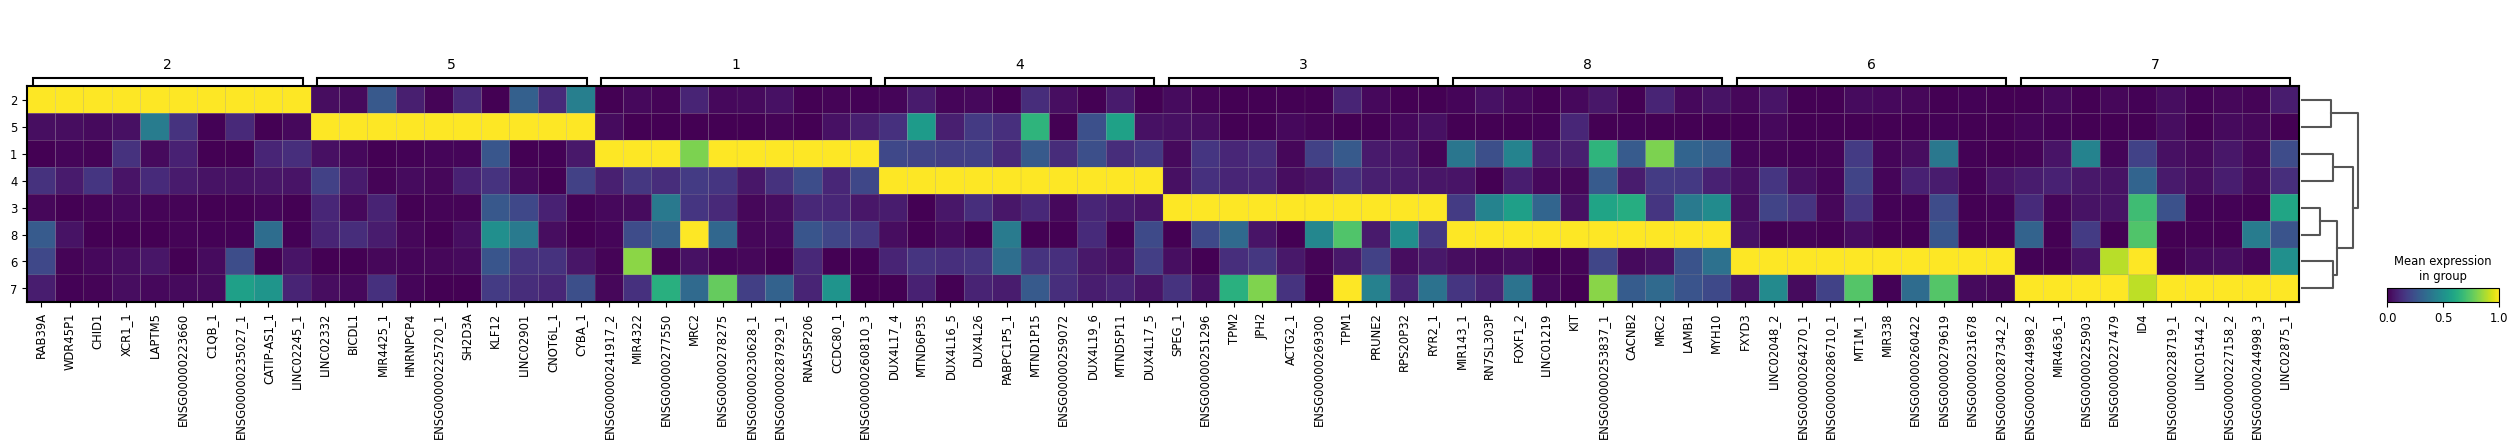

In [23]:
for res in adata.uns['infoprocess']['leiden_res']:
    print(f'Plotting matrixplot for leiden with resolution: {res}')
    plot_key = 'rank_genes_groups_' + str(res)
    sc.pl.rank_genes_groups_matrixplot(genes_adata, standard_scale='var', n_genes=10, key=plot_key, show=False)
    # TODO
    # if save_figs:
    #    plt.savefig(f'{OUTPUT_FIGS}/ranked_genes_groups_matrixplot_leiden_{res}.png')
    plt.show()

In [26]:
ctannot.annot_ct(adata=adata, genes_adata=genes_adata, output_path=tree, db_path=f"{CTA_PATH}/panglao_markers", cluster_path=None, cluster_column="leiden_0.1", rank_genes_column="rank_genes_groups_0.1", sample=tree.run, ct_column="cell_types", tissue="all", db="panglao", inplace=True)

Output folder: <sctoolbox.atac_tree.ATAC_tree object at 0x7f5f8e6ebf40>/leiden_0.1/ 
DB file: /mnt/workspace/jdetlef/sc-atac-framework/ctannot/panglao_markers 
Cluster folder: <sctoolbox.atac_tree.ATAC_tree object at 0x7f5f8e6ebf40>/ranked/clusters/leiden_0.1/ 
Tissue: all 
DB: panglao
Created folder: <sctoolbox.atac_tree.ATAC_tree object at 0x7f5f8e6ebf40>/ranked/clusters/leiden_0.1
Created folder: <sctoolbox.atac_tree.ATAC_tree object at 0x7f5f8e6ebf40>/ranked/output/leiden_0.1
Writing one file per cluster containing gene names and ranked gene scores.
Starting cell type annotation.
Loading PanglaoDB
Adding information to the adata object.
Finished cell type annotation! The results are found in the .obs table cell_types.


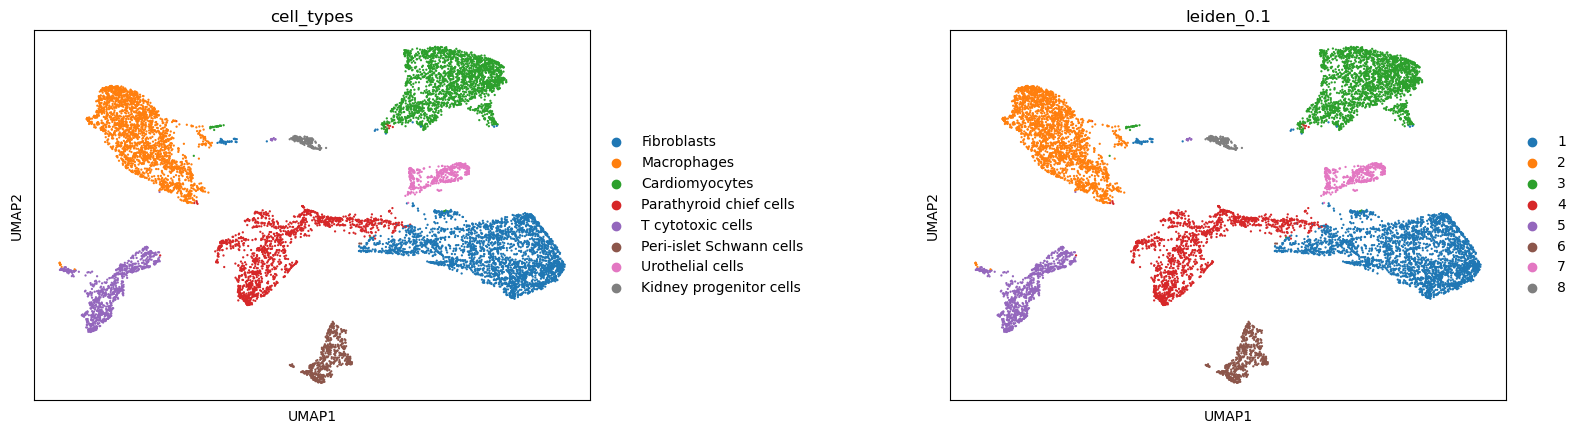

In [27]:
sc.pl.umap(adata, color=['cell_types', 'leiden_0.1'], wspace=0.5)

## Modify wrong cluster annotations by selecting other recommendations

Create copies of obs tables

In [29]:
for res in adata.uns['infoprocess']['leiden_res']:
    adata.obs[f'custom_script_ranked_mod_{res}'] = adata.obs[f'custom_script_ranked_{res}']

KeyError: 'custom_script_ranked_0.1'

In [30]:
adata.obs

,TN,UM,PP,UQ,CM,file,sample,n_features_by_counts,log1p_n_features_by_counts,total_counts,...,leiden_0.2,leiden_0.3,leiden_0.4,leiden_0.5,leiden_0.6,leiden_0.7,leiden_0.8,leiden_0.9,clustering,cell_types
barcode,,,,,,,,,,,,,,,,,,,,,
AAACTACCAGAAACGTCCCGTT,6223.0,5232.0,5214.0,3780.0,18.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,1338,7.199678,1338.0,...,2,1,1,4,3,3,2,3,2,Macrophages
AAACTACCAGAACTAACGTCGA,8196.0,6756.0,6737.0,4617.0,382.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,271,5.605802,271.0,...,4,4,4,3,6,6,6,6,4,Parathyroid chief cells
AAACTACCAGAATGGCCGTTTC,23198.0,20082.0,20039.0,14075.0,1132.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,3855,8.257386,3855.0,...,1,2,2,1,2,2,3,1,1,Fibroblasts
AAACTACCAGACAGATCAACGC,5869.0,4993.0,4976.0,3411.0,35.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,1154,7.051856,1154.0,...,5,5,5,6,7,8,7,10,5,T cytotoxic cells
AAACTACCAGACAGCGTCACTA,5886.0,5183.0,5176.0,4074.0,22.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,1846,7.521318,1846.0,...,3,3,3,2,1,1,1,2,3,Cardiomyocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCCATCCTCTTCTCATGGTCA,5447.0,4744.0,4728.0,3243.0,10.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,1475,7.297091,1475.0,...,3,3,3,2,1,1,1,2,3,Cardiomyocytes
TTCCATCCTCTTGACAAGTCCT,1577.0,1342.0,1337.0,909.0,1.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,253,5.537334,253.0,...,5,5,5,6,13,13,13,14,5,T cytotoxic cells
TTCCATCCTCTTGAGCCCGGAT,9935.0,7985.0,7957.0,5603.0,13.0,/mnt/workspace/jdetlef/data/anndata/Esophagus....,sample1,577,6.359574,577.0,...,6,7,7,8,8,9,8,8,6,Peri-islet Schwann cells
